<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#we will need this imports for preprocessing sections
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [93]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

## Loading Data to Pandas DataFrame

In [96]:
df = pd.read_csv("./real-estate.csv")
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [97]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [98]:
# Drop rows with any missing values
print(df.shape)
#for NaN values
df.dropna(inplace = True)
print(f"after dropping nans: {df.shape}")

#eliminate ? values
for (column_name , _) in df.items():
    
    mask = df[f"{column_name}"] == '?'
    
    df = df[~mask]
    print(f"after dropping ? value from {column_name}: {df.shape} ")

print(f"final shape {df.shape}")

(414, 8)
after dropping nans: (414, 8)
after dropping ? value from No: (414, 8) 
after dropping ? value from X1 transaction date: (414, 8) 
after dropping ? value from X2 house age: (414, 8) 
after dropping ? value from X3 distance to the nearest MRT station: (414, 8) 
after dropping ? value from X4 number of convenience stores: (414, 8) 
after dropping ? value from X5 latitude: (414, 8) 
after dropping ? value from X6 longitude: (414, 8) 
after dropping ? value from Y house price of unit area: (414, 8) 
final shape (414, 8)


## Droping Unnecessary Columns

In [99]:
y = df["Y house price of unit area"]
df = df.drop(['No',"Y house price of unit area"],axis = 1)
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


## Splitting Data to Train and Test

In [100]:
xtrain , xtest , ytrain , ytest = train_test_split(df,y,test_size = 0.2 , random_state = 3)

In [89]:

def standardScalerFunction(data):
    scaler = MinMaxScaler().fit(data)
    return scaler.transform(data.astype(float))

xtrain = standardScalerFunction(xtrain)
xtrain_df = pd.DataFrame(xtrain, columns=df.columns)
xtest = standardScalerFunction(xtest)
xtest_df = pd.DataFrame(xtest, columns=df.columns)
xtrain_df.head(5)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.727074,0.374429,0.042329,0.5,0.605429,0.749863
1,0.090611,0.178082,0.012960,0.5,0.420141,0.719021
2,0.636463,0.148402,0.056152,0.6,0.267935,0.680167
3,0.090611,0.308219,0.664351,0.0,0.082162,0.314675
4,0.727074,0.906393,0.049339,0.9,0.582768,0.704204


## Visualizing Data Distribution and Correlation

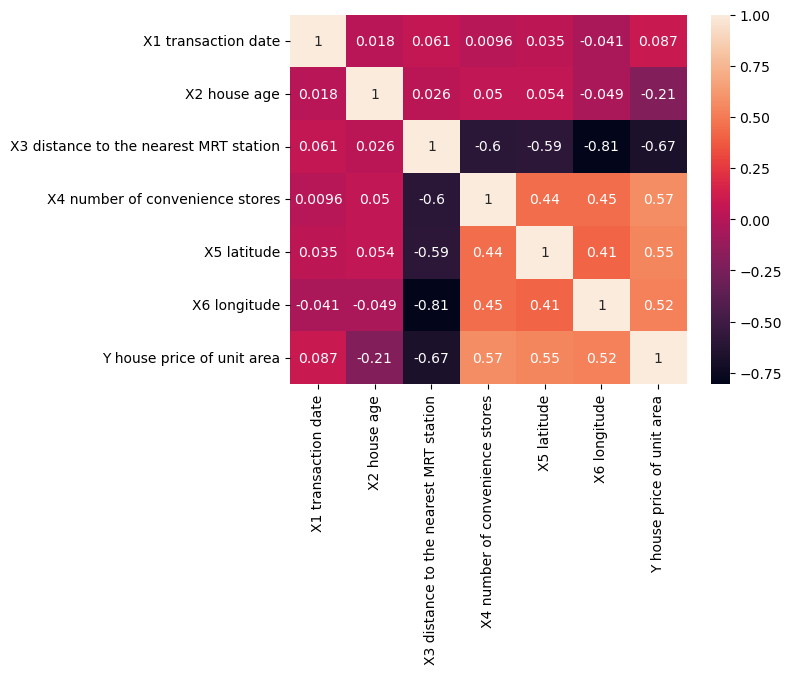

In [90]:
import seaborn as sns

df.insert(6 ,"Y house price of unit area", y)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [63]:
def box_plot(data,title):
    plt.boxplot(data, patch_artist=True)
    plt.title(f"{title} BOX PLOT")
    plt.ylabel(f"{title} Rate")
    plt.savefig(f'./boxplots/{title}.png')
    plt.close()


In [92]:
for (column_name , _) in xtrain_df.items():
    box_plot(xtrain_df[f"{column_name}"],column_name)

In [65]:
def  house_price_plotter(title,x,y):
    plt.figure(figsize=(10,5))
    plt.plot(x,y,'r')
    plt.xlabel(title)
    plt.ylabel('house price')
    plt.savefig(f'./house_price_plots/{title}.png')
    plt.close()

In [66]:
for (column_name , _) in df.items():

    if column_name != "Y house price of unit area":
        house_price_plotter(column_name,df[f"{column_name}"],df["Y house price of unit area"])

In [ ]:
"after analyzing the plots and boxplot and correlation plots we may infer that X1 transaction date is not useful for training"

## Linear Regression

  Coefficients: [ 5.05010829e+00 -2.66591880e-01 -4.91555005e-03  1.12156060e+00
  2.00141790e+02 -4.46528060e+01]
  Mean Squared Error: 76.55288191151112
  R2 Score: 0.605615272584304


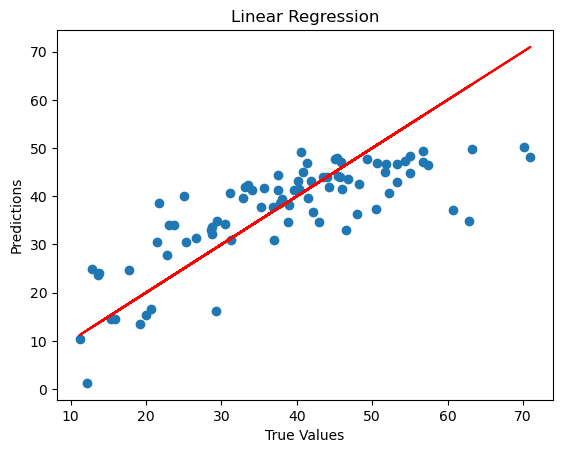

In [103]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

y_true = np.array(ytest)
y_pred = np.array(predictions)
accuracy = np.mean(np.abs((y_true - y_pred) / y_true) <= 0.1) * 100

print("  Coefficients:", model.coef_)
print("  Mean Squared Error:", mse)
print("  R2 Score:", r2)
plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Linear Regression')
plt.show()

## Polynomial Regression

## Ridge Regression

## Lasso Regression

## Elastic Net Regression

## XGBoost Regression 

# Assosiation Rules

In [1]:
# 0. Import Libraries


# 1. Data Loading


# 2. Preprocess Data


# 3. Apply TransactionEncoder


# 4. Generate Frequent Itemsets


# 5. Generate Association Rules


# 6. Display Rules

